In [7]:
#supervised learning
##decision tree
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv('/home/silver/Desktop/jupyter/datasets/diabetes.csv')
print("shape of dataset", df.shape) #roes and columns
df.head(10)

shape of dataset (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#Split the data into features (X) and labels (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [9]:
#Initialize the decision tree classifier
geo= DecisionTreeClassifier(criterion='entropy',random_state=42)
#geo = DecisionTreeClassifier(criterion='gini',random_state=42)

#Train the model on the training data
geo.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [10]:
y_pred = geo.predict(X_test)
print (y_pred)

[0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1
 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 1 0]


In [11]:
#Calculate the accuracy of the decision tree classifier.
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
#Alternatively use the code below:
print(f"Accuracy: {accuracy:.2f}")

#Evaluate the model's performance
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7207792207792207
Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

Confusion Matrix:
[[76 23]
 [20 35]]


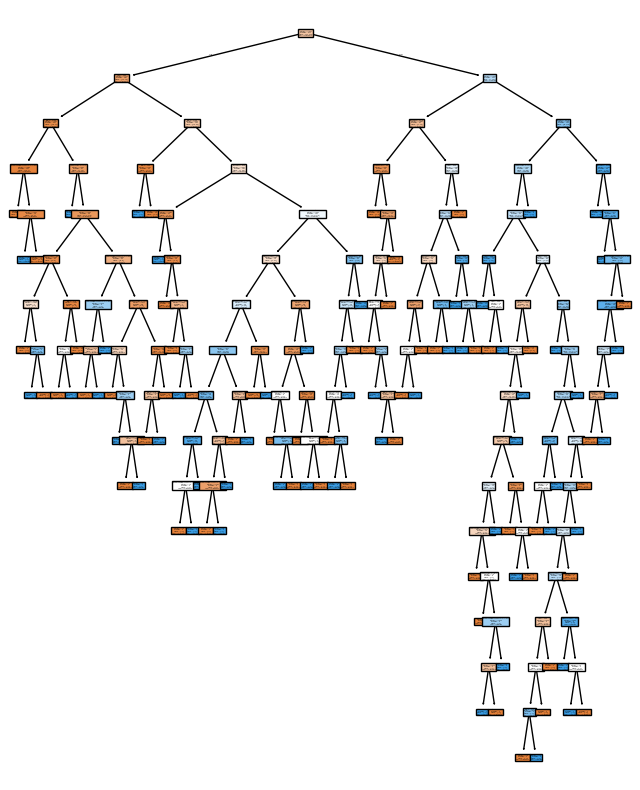

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 10))
plot_tree(geo, filled=True, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"])
plt.show()

In [19]:
import joblib  # Importing joblib library to save and load models

#Initializing a Decision Tree classifier with a fixed random state for reproducibility
geo = DecisionTreeClassifier(random_state=42)

#Training the Decision Tree model using the training data (features X_train and labels y_train)
geo.fit(X_train, y_train)

#Saving the trained Decision Tree model to a file named 'decision_tree_model.pkl'
#so it can be reloaded and used later without retraining
joblib.dump(geo, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [21]:
import joblib
import pandas as pd

#Load the saved model
loaded_model = joblib.load('decision_tree_model.pkl')

#Prepare your new data with attribute names
new_data = pd.DataFrame({
'Pregnancies': [2, 4, 1, 5],
'Glucose': [100, 150, 95, 130],
'BloodPressure': [70, 80, 60, 90],
'SkinThickness': [32, 35, 25, 40],
'Insulin': [45, 50, 40, 60],
'BMI': [32.0, 35.5, 29.0, 40.2],
'DiabetesPedigreeFunction': [0.4, 0.5, 0.3, 0.6],
'Age': [30, 35, 28, 40]
})

#Make predictions on the new data
predictions = loaded_model.predict(new_data)

#Create a mapping from 0 to "Not Diabetic" and 1 to "Diabetic"
diabetes_mapping = {0: "0-Not Diabetic", 1: "1-Diabetic"}

#Print the predictions with labels
for i, prediction in enumerate(predictions):
    label = diabetes_mapping[prediction]
print(f"Data {i + 1}: Predicted Outcome - {label}")

Data 4: Predicted Outcome - 0-Not Diabetic
